Q.1) Read two different .csv files ‘User Usage.csv’ & ‘User device.csv’.  Use the statistical skills to
 answer the following questions.       
 
	a) Perform any suitable method to combine these datasets (concat/Merge/ Join). Apply data pre-processing techniques on given data set.                                             
	b) Analyse your data using exploratory data analysis.      
	c) Draw your conclusions and comment on your findings.                                                                   
______________________________________________________________________________________________________________________

Q.2) Based on the above data frame, Use the programming skill to answer the following questions.                \
a)	Create the basket for discount on Monthly MB:                                                                \             
Monthly MB	Discount to attract users  \
Upto 50 MB:	        10% extra on monthly MB  usage  \
51 MB- 1000 MB: 	4% extra on monthly MB usage    \
1001MB – 15000MB:	3% extra on monthly MB usage    \
15001MB – 30000MB:	2% extra on monthly MB usage   \
b)	Create the new column “Message” having message for user as mentioned below:    \
“Greetings, Your Monthly used data is 50MB. You will get 55 MB data to use for the next month.”     \
c)	Find   

    i)	Which platform user uses highest Monthly_mb used.    
    ii)	Least used device.   
    iii) Count of the IOS users  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
usage=pd.read_csv('user_usage.csv')
print(usage.head(2))
print(usage.shape)

   outgoing_mins_per_month  outgoing_sms_per_month  monthly_mb  use_id
0                    21.97                    4.82     1557.33   22787
1                  1710.08                  136.88     7267.55   22788
(240, 4)


In [3]:
device=pd.read_csv('user_device.csv')
print(device.head(2))
print(device.shape)

   use_id  user_id platform  platform_version     device  use_type_id
0   22782    26980      ios              10.2  iPhone7,2            2
1   22783    29628  android               6.0    Nexus 5            3
(272, 6)


In [4]:
print(device['use_id'].unique())
print(usage['use_id'].unique())

[22782 22783 22784 22785 22786 22787 22788 22789 22790 22791 22792 22793
 22794 22795 22796 22797 22798 22799 22800 22801 22802 22803 22804 22805
 22806 22807 22808 22809 22810 22811 22812 22813 22814 22815 22816 22817
 22818 22819 22820 22821 22822 22823 22824 22825 22826 22827 22828 22829
 22830 22831 22832 22833 22834 22835 22836 22837 22838 22839 22840 22841
 22842 22843 22844 22845 22846 22847 22848 22849 22850 22851 22852 22853
 22854 22855 22856 22857 22858 22859 22860 22861 22862 22863 22864 22865
 22866 22867 22868 22869 22870 22871 22872 22873 22874 22875 22876 22877
 22878 22879 22880 22881 22882 22883 22884 22885 22886 22887 22888 22889
 22890 22891 22892 22893 22894 22895 22896 22897 22898 22899 22900 22901
 22902 22903 22904 22905 22906 22907 22908 22909 22910 22911 22912 22913
 22914 22915 22916 22917 22918 22919 22920 22921 22922 22923 22924 22925
 22926 22927 22928 22929 22930 22931 22932 22933 22934 22935 22936 22937
 22938 22939 22940 22941 22942 22943 22944 22945 22

In [5]:
data=pd.merge(usage,device, on='use_id', how='outer')
data

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,user_id,platform,platform_version,device,use_type_id
0,21.97,4.82,1557.33,22787,12921.0,android,4.3,GT-I9505,1.0
1,1710.08,136.88,7267.55,22788,28714.0,android,6.0,SM-G930F,1.0
2,1710.08,136.88,7267.55,22789,28714.0,android,6.0,SM-G930F,1.0
3,94.46,35.17,519.12,22790,29592.0,android,5.1,D2303,1.0
4,71.59,79.26,1557.33,22792,28217.0,android,5.1,SM-G361F,1.0
...,...,...,...,...,...,...,...,...,...
348,NaN,NaN,NaN,23047,29720.0,ios,10.2,"iPhone7,1",2.0
349,NaN,NaN,NaN,23048,29724.0,android,6.0,ONEPLUS A3003,3.0
350,NaN,NaN,NaN,23050,29726.0,ios,10.2,"iPhone7,2",3.0
351,NaN,NaN,NaN,23051,29726.0,ios,10.2,"iPhone7,2",3.0


In [6]:
data.isnull().sum()

outgoing_mins_per_month    113
outgoing_sms_per_month     113
monthly_mb                 113
use_id                       0
user_id                     81
platform                    81
platform_version            81
device                      81
use_type_id                 81
dtype: int64

In [7]:
col=['user_id','use_type_id','use_id']
data=data.drop(columns=col,axis=1)
data.head(2)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,platform,platform_version,device
0,21.97,4.82,1557.33,android,4.3,GT-I9505
1,1710.08,136.88,7267.55,android,6.0,SM-G930F


In [8]:
print(data['outgoing_mins_per_month'].mean())
print(data['outgoing_mins_per_month'].median())
print(data['outgoing_mins_per_month'].mode())

274.55916666666667
189.705
0    677.02
dtype: float64


In [9]:
print(data['outgoing_sms_per_month'].mean())
print(data['outgoing_sms_per_month'].median())
print(data['outgoing_sms_per_month'].mode())

98.96829166666666
70.775
0    101.86
dtype: float64


In [10]:
print(data['monthly_mb'].mean())
print(data['monthly_mb'].median())
print(data['monthly_mb'].mode())

3628.6020416666647
1797.975
0    1557.33
dtype: float64


In [11]:
print(data['platform'].mode())
print(data['platform'].value_counts())

0    android
dtype: object
android    184
ios         88
Name: platform, dtype: int64


In [12]:
print(data['platform_version'].mean())
print(data['platform_version'].median())
print(data['platform_version'].mode())

6.917647058823527
6.0
0    6.0
dtype: float64


In [13]:
print(data['device'].mode())
print(data['device'].value_counts())

0    SM-G900F
dtype: object
SM-G900F         32
iPhone7,2        27
iPhone6,2        22
GT-I9505         13
ONEPLUS A3003     9
                 ..
C6603             1
iPhone3,1         1
iPad4,1           1
iPhone3,2         1
iPhone9,3         1
Name: device, Length: 72, dtype: int64


In [14]:
data['outgoing_mins_per_month']=data['outgoing_mins_per_month'].fillna(data['outgoing_mins_per_month'].mean())
data['outgoing_sms_per_month']=data['outgoing_sms_per_month'].fillna(data['outgoing_sms_per_month'].median())
data['platform_version']=data['platform_version'].fillna(data['platform_version'].median())
data['device']=data['device'].fillna(data['device'].value_counts()[0])
data['platform']=data['platform'].fillna(data['platform'].value_counts()[0])
data['monthly_mb']=data['monthly_mb'].fillna(data['monthly_mb'].median())
data.isnull().sum()

outgoing_mins_per_month    0
outgoing_sms_per_month     0
monthly_mb                 0
platform                   0
platform_version           0
device                     0
dtype: int64

<AxesSubplot:xlabel='platform', ylabel='platform_version'>

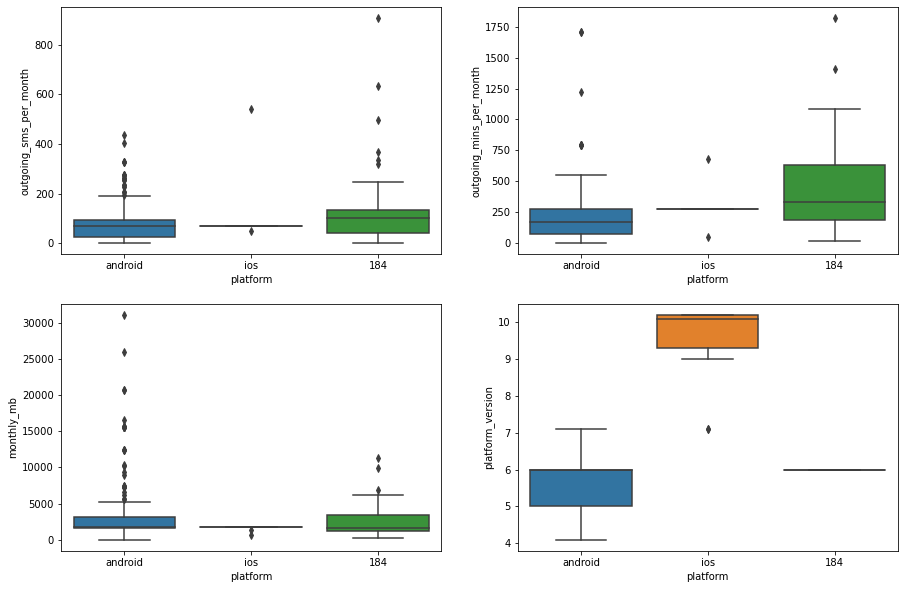

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], data=data, x='platform', y='outgoing_sms_per_month')
sns.boxplot(ax=axes[0, 1], data=data, x='platform', y='outgoing_mins_per_month')
sns.boxplot(ax=axes[1,0], data=data, x='platform', y='monthly_mb')
sns.boxplot(ax=axes[1, 1], data=data, x='platform', y='platform_version')

<AxesSubplot:xlabel='platform', ylabel='outgoing_mins_per_month'>

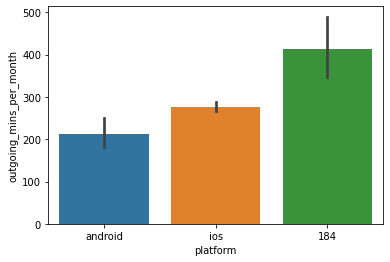

In [16]:
sns.barplot(x='platform',y='outgoing_mins_per_month',data=data)

<AxesSubplot:xlabel='platform', ylabel='monthly_mb'>

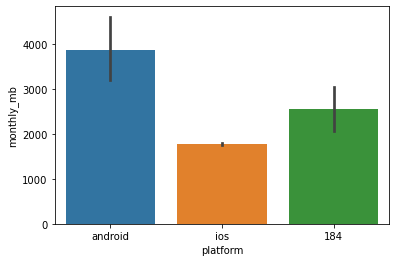

In [17]:
sns.barplot(x='platform',y='monthly_mb',data=data)

**c)	Find**   

    i)	Which platform user uses highest Monthly_mb used.    
    ii)	Least used device.   
    iii) Count of the IOS users 

<AxesSubplot:xlabel='platform'>

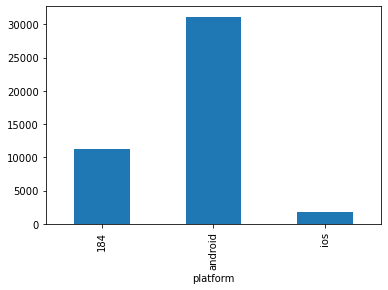

In [18]:
## Platform user uses highest monthly mb
data['monthly_mb'].groupby(data['platform']).max().plot(kind='bar')

In [19]:
data.groupby(data['device']).count()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,platform,platform_version
device,,,,,
32,81,81,81,81,81
A0001,2,2,2,2,2
C6603,1,1,1,1,1
D2303,2,2,2,2,2
D5503,2,2,2,2,2
...,...,...,...,...,...
"iPhone7,2",27,27,27,27,27
"iPhone8,1",2,2,2,2,2
"iPhone8,4",4,4,4,4,4


In [20]:
##Count of the IOS user
data.groupby(data['platform']=='ios').count()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,platform,platform_version,device
platform,,,,,,
False,265,265,265,265,265,265
True,88,88,88,88,88,88


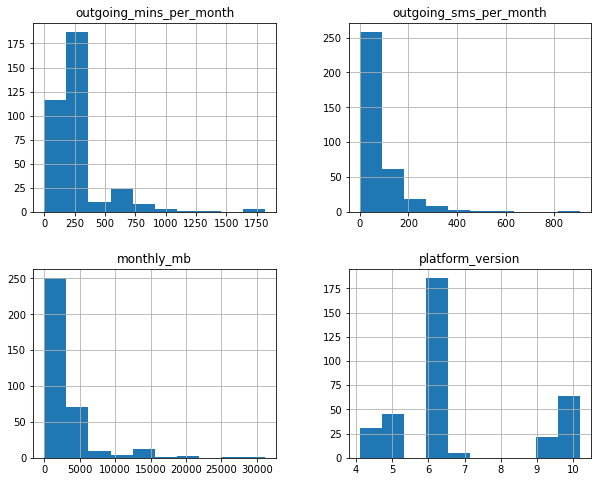

In [21]:
data.hist(figsize=(10,8))
plt.show()

<AxesSubplot:>

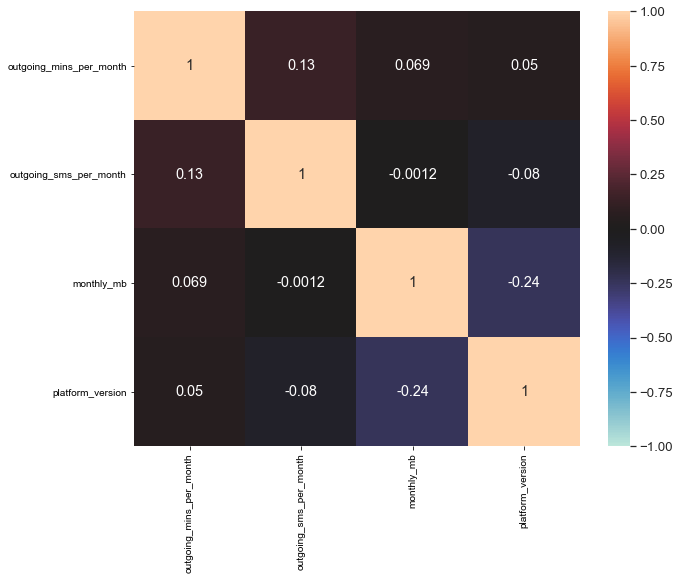

In [22]:
# Correlation plot of the data.
plt.subplots(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(data.corr(),annot=True,vmin=-1, vmax=1, center= 0)

In [23]:
data.describe()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,platform_version
count,353.000000,353.000000,353.000000,353.000000
mean,274.559167,89.943244,3042.593952,6.707082
std,242.046720,92.548444,3794.364013,1.921242
min,0.500000,0.250000,0.000000,4.100000
25%,125.320000,44.360000,1557.330000,6.000000
50%,274.559167,70.775000,1797.975000,6.000000
75%,274.559167,94.570000,3114.670000,7.100000
max,1816.630000,906.920000,31146.670000,10.200000


Q.2) Based on the above data frame, Use the programming skill to answer the following questions.                \
a)	Create the basket for discount on Monthly MB:                                                                \             
Monthly MB	Discount to attract users  \
Upto 50 MB:	        10% extra on monthly MB  usage  \
51 MB- 1000 MB: 	4% extra on monthly MB usage    \
1001MB – 15000MB:	3% extra on monthly MB usage    \
15001MB – 30000MB:	2% extra on monthly MB usage   \
b)	Create the new column “Message” having message for user as mentioned below:    \
“Greetings, Your Monthly used data is 50MB. You will get 55 MB data to use for the next month.”     \

    
https://pbpython.com/market-basket-analysis.html

discount_10 = (data[data['monthly_mb'] <=50].apply(lambda x:x+(x*0.1)))
discount_10           

discount_4 = (data[(data['monthly_mb'] >=51) & (data['monthly_mb']<=1000)].apply(lambda x:x+(x*0.04)))
discount_4   

discount_3 = (data[(data['monthly_mb'] >=1001) & (data['monthly_mb']<=15000)].apply(lambda x:x+(x*0.03)))
discount_3   

discount_2 = (data[(data['monthly_mb'] >=15001) & (data['monthly_mb']<=30000)].apply(lambda x:x+(x*0.02)))
discount_2   

### Q2)a)

for i in range(len(discount_10)):
    print('Greetings, Your Monthly used data is %s. You will get %i MB data to use for the next month'%(data[data['monthly_mb']<=50].iloc[i,2],discount_10.iloc[i,2]))   

for i in range(len(discount_4)):
    print('Greetings, Your Monthly used data is %s. You will get %i MB data to use for the next month'%(data[(data['monthly_mb'] >=51) & (data['monthly_mb']<=1000)].iloc[i,2],discount_4.iloc[i,2]))

for i in range(len(discount_3)):
    print('Greetings, Your Monthly used data is %s. You will get %i MB data to use for the next month'%(data[(data['monthly_mb'] >=1001) & (data['monthly_mb']<=15000)].iloc[i,2],discount_3.iloc[i,2]))   

for i in range(len(discount_2)):
    print('Greetings, Your Monthly used data is %s. You will get %i MB data to use for the next month'%(data[(data['monthly_mb'] >=15001) & (data['monthly_mb']<=30000)].iloc[i,2],discount_2.iloc[i,2]))
    

In [24]:
## Discount function for monthly mb
def discount_message(x):
    monthly_mb=x
    try:
        if x <51:
            dic= x*0.1
        elif 50<x<1001:
            dic=x*0.04
        elif 1000<x<15001:
            dic=x*0.03
        else:
            dic=x*0.02
        
        final=monthly_mb+dic
        print(final)
        str_mb=str(monthly_mb)
        str_final= str(final)
        str1="Your monthly data is "+str_mb+"you will get "+ str_final +" data to use for the next month."
        return str1
    except:
        print("error")

In [25]:
data['Message']=data['monthly_mb'].apply(discount_message)

1604.0499
7485.5765
7485.5765
539.8848
1604.0499
1604.0499
539.8848
539.8848
3208.1101
26474.661
3208.1101
539.8848
15884.7966
539.8848
539.8848
15884.7966
15884.7966
15884.7966
15884.7966
10693.6763
15884.7966
15884.7966
3208.1101
5346.8535999999995
1309.5317
539.8848
423.2904
1604.0499
5346.8535999999995
15884.7966
3208.1101
1604.0499
1604.0499
539.8848
539.8848
539.8848
3208.1101
1604.0499
6416.2099
1069.3563000000001
1069.3563000000001
1604.0499
3208.1101
3208.1101
5346.8535999999995
37.169
1604.0499
539.8848
1604.0499
1604.0499
1604.0499
3208.1101
7693.8837
2138.7434999999996
2138.7434999999996
2138.7434999999996
539.8848
1604.0499
1604.0499
3208.1101
1668.6515
3208.1101
16943.781
1604.0499
3208.1101
3208.1101
5346.8535999999995
4277.4664
2138.7434999999996
3208.1101
9275.6547
1604.0499
1830.9382999999998
1604.0499
7485.5765
7485.5765
1604.0499
1604.0499
1604.0499
1604.0499
3208.1101
3208.1101
3208.1101
539.8848
3208.1101
2432.9321
539.8848
539.8848
3208.1101
539.8848
3208.1101
21

In [26]:
data.head(5) 

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,platform,platform_version,device,Message
0,21.97,4.82,1557.33,android,4.3,GT-I9505,Your monthly data is 1557.33you will get 1604....
1,1710.08,136.88,7267.55,android,6.0,SM-G930F,Your monthly data is 7267.55you will get 7485....
2,1710.08,136.88,7267.55,android,6.0,SM-G930F,Your monthly data is 7267.55you will get 7485....
3,94.46,35.17,519.12,android,5.1,D2303,Your monthly data is 519.12you will get 539.88...
4,71.59,79.26,1557.33,android,5.1,SM-G361F,Your monthly data is 1557.33you will get 1604....


### house hold Glass prediction

Q.3) Find the following data set. Observe all the variables and data values given in the data set. Using the machine learning skill answer the following questions   [20 Marks]
DATA SET: Glass Data Set
This data is the result of a chemical composition of the glass. Based on chemical composition type of glass is defined.  
Attribute Information is as mentioned below:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
                  are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed 
      
      -- 2 building_windows_non_float_processed
      
      -- 3 vehicle_windows_float_processed
      
      -- 4 vehicle_windows_non_float_processed (none in this database)
      
      -- 5 containers
      
      -- 6 tableware
      
      -- 7 headlamps

Using a suitable machine learning technique, develop a suitable model to predict, if glass can be used for household purpose. 


In [27]:
glass=pd.read_csv('glass.csv')
glass.head(1)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.1,71.78,0.06,8.75,0.0,0.0,1


In [28]:
glass.shape

(214, 11)

In [29]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [30]:
glass.drop(columns='Id',axis=1,inplace=True)

In [31]:
glass.describe() ##Statistical description of the data.

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:>

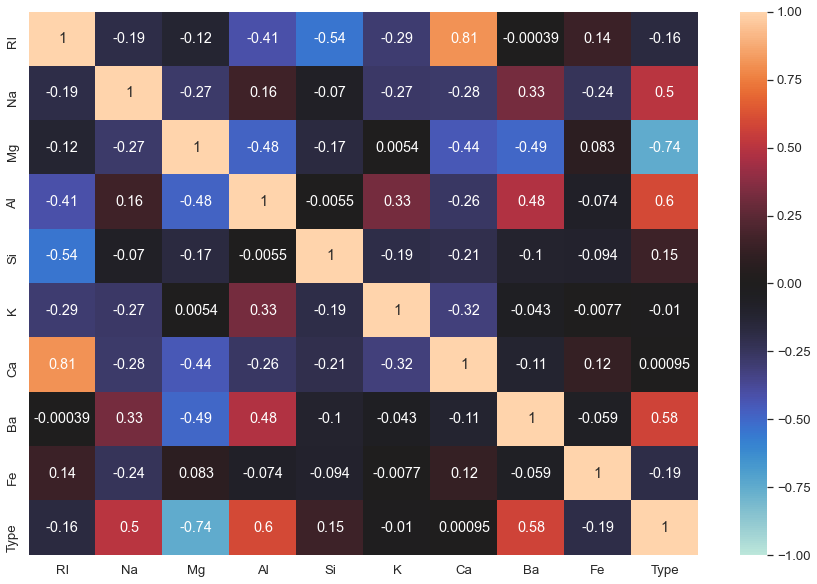

In [32]:
# Correlation plot of the data.
plt.subplots(figsize=(15,10))
sns.set(font_scale=1.2)
sns.heatmap(glass.corr(),annot=True,vmin=-1, vmax=1, center= 0)

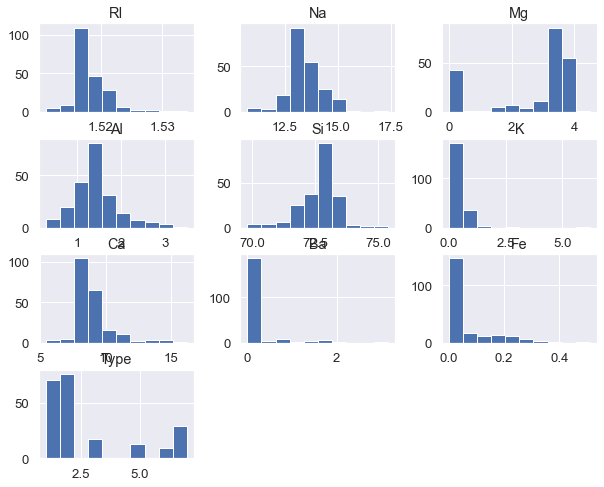

In [33]:
glass.hist(figsize=(10,8))
plt.show()

In [34]:
features= glass.iloc[:,:-1]
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


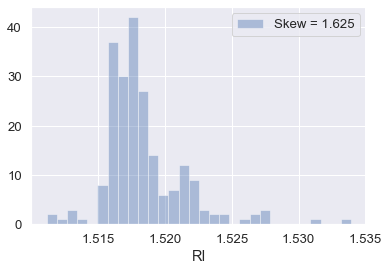

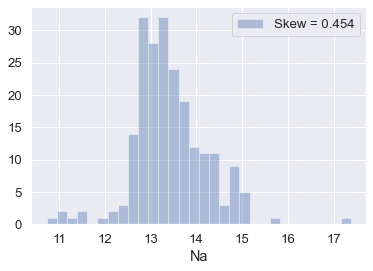

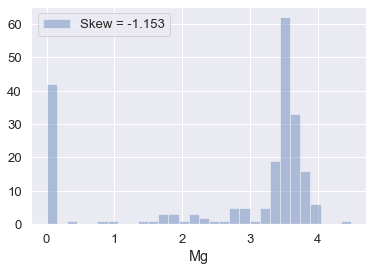

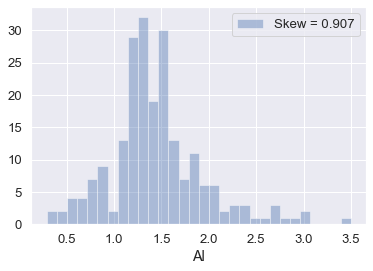

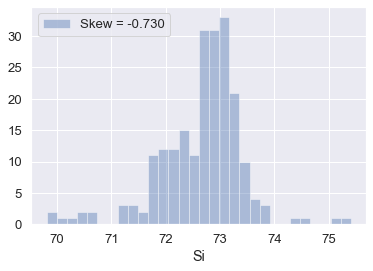

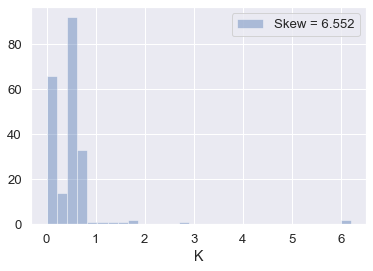

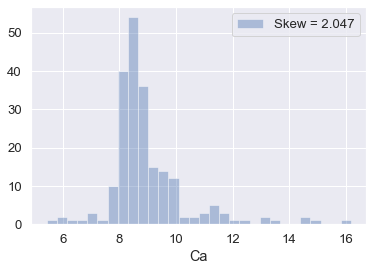

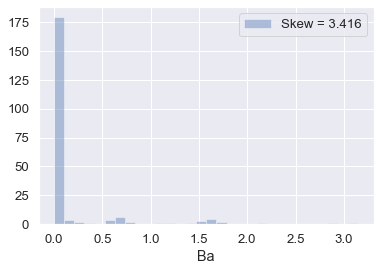

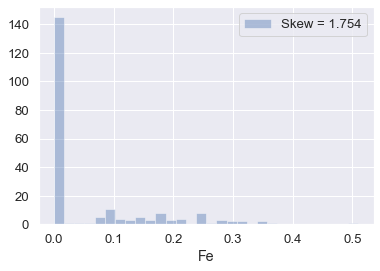

In [35]:
for feat in features:
    skew = glass[feat].skew()
    sns.distplot(glass[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

### Analysis

In [36]:
from sklearn.model_selection import train_test_split
X = features 
y = glass['Type'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25 , random_state = 12)

#### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
tree = RandomForestClassifier(n_estimators=120)
tree.fit(X_train,y_train)

RandomForestClassifier(n_estimators=120)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc
predictions = tree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.75      0.80      0.77        15
           2       0.80      0.84      0.82        19
           3       0.33      0.50      0.40         2
           5       0.67      1.00      0.80         2
           6       1.00      0.20      0.33         5
           7       0.82      0.82      0.82        11

    accuracy                           0.76        54
   macro avg       0.73      0.69      0.66        54
weighted avg       0.79      0.76      0.75        54

[[12  2  1  0  0  0]
 [ 1 16  1  0  0  1]
 [ 1  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 1  1  0  1  1  1]
 [ 1  1  0  0  0  9]]


#### XG-Boost Classifier

In [40]:
from xgboost import XGBClassifier
xgb=XGBClassifier(base_score=0.01,n_estimators=2000,n_jobs=2)
xgb.fit(X_train,y_train)

C:\Users\user\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:00:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.01, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
y_predi=xgb.predict(X_test)

In [50]:
print(classification_report(y_test,y_predi))
print(confusion_matrix(y_test,y_predi))

              precision    recall  f1-score   support

           1       0.93      0.87      0.90        15
           2       0.82      0.95      0.88        19
           3       0.50      1.00      0.67         2
           5       0.67      1.00      0.80         2
           6       1.00      0.40      0.57         5
           7       1.00      0.82      0.90        11

    accuracy                           0.85        54
   macro avg       0.82      0.84      0.79        54
weighted avg       0.89      0.85      0.85        54

[[13  1  1  0  0  0]
 [ 0 18  1  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  2  0  1  2  0]
 [ 1  1  0  0  0  9]]


### Lightgbm Classifier

In [53]:
import lightgbm as lgb
clfi=lgb.LGBMClassifier(learning_rate=0.5, n_estimators=550)
clfi.fit(X_train,y_train)

LGBMClassifier(learning_rate=0.5, n_estimators=550)

In [54]:
y_pred=clfi.predict(X_test)

In [55]:
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.89      0.81      0.85        21
           3       1.00      0.50      0.67         4
           5       1.00      1.00      1.00         2
           6       0.40      1.00      0.57         2
           7       0.82      0.90      0.86        10

    accuracy                           0.83        54
   macro avg       0.83      0.85      0.80        54
weighted avg       0.87      0.83      0.84        54

[[13  1  0  0  0  1]
 [ 1 17  0  0  2  1]
 [ 1  1  2  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  9]]


### Evaluation
#### ROC-AUC Curve for Two Type of glass for household

In [58]:
# For building windows_Floatprocessed glass type=1
rf_fpr,rf_tpr,threshold=roc_curve(y_test,predictions,pos_label=1)
auc_rfc=auc(rf_fpr,rf_tpr)
xgb_fpr,xgb_tpr,threshold=roc_curve(y_test,y_predi,pos_label=1)
auc_xgb=auc(xgb_fpr,xgb_tpr)
lgb_fpr,lgb_tpr,threshold=roc_curve(y_test,y_pred,pos_label=1)
auc_lgb=auc(lgb_fpr,lgb_tpr)

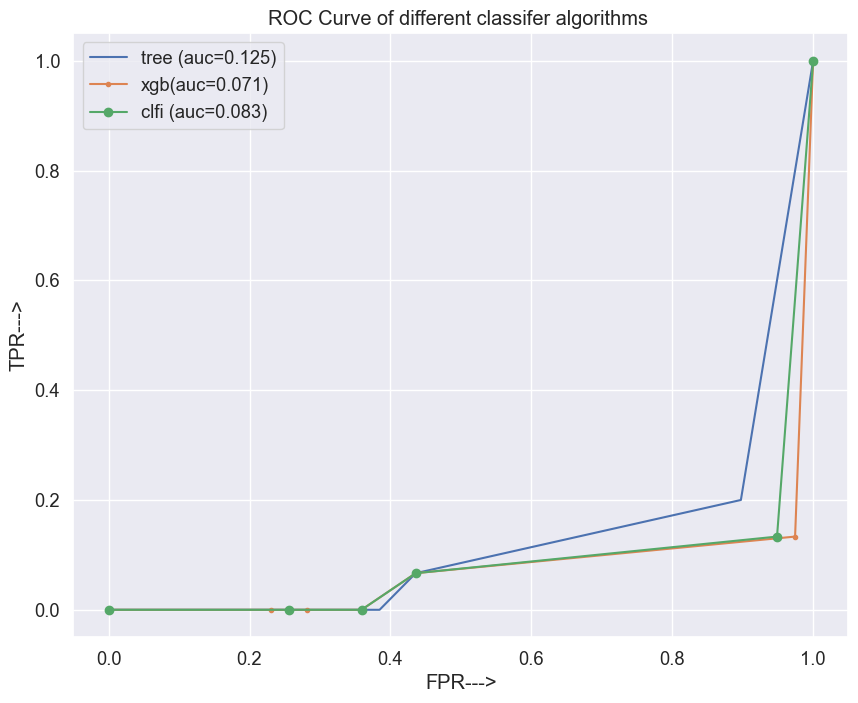

<Figure size 432x288 with 0 Axes>

In [59]:
# ROC-AUC Curve of all models.
plt.figure(figsize=(10,8),dpi=100)
plt.plot(rf_fpr,rf_tpr,linestyle="-",label='tree (auc=%0.3f)' %auc_rfc)
plt.plot(xgb_fpr,xgb_tpr,marker='.',label='xgb(auc=%0.3f)' %auc_xgb)
plt.plot(lgb_fpr,lgb_tpr,marker='o',label='clfi (auc=%0.3f)' %auc_lgb)
plt.xlabel('FPR--->')
plt.ylabel('TPR--->')
plt.title("ROC Curve of different classifer algorithms ")
plt.legend()
plt.show()
plt.savefig('ROC Curve(different algorithms).png')

In [61]:
#building_windows_non_float_processed=2
rf_fpr,rf_tpr,threshold=roc_curve(y_test,predictions,pos_label=2)
auc_rfc=auc(rf_fpr,rf_tpr)
xgb_fpr,xgb_tpr,threshold=roc_curve(y_test,y_predi,pos_label=2)
auc_xgb=auc(xgb_fpr,xgb_tpr)
lgb_fpr,lgb_tpr,threshold=roc_curve(y_test,y_pred,pos_label=2)
auc_lgb=auc(lgb_fpr,lgb_tpr)         

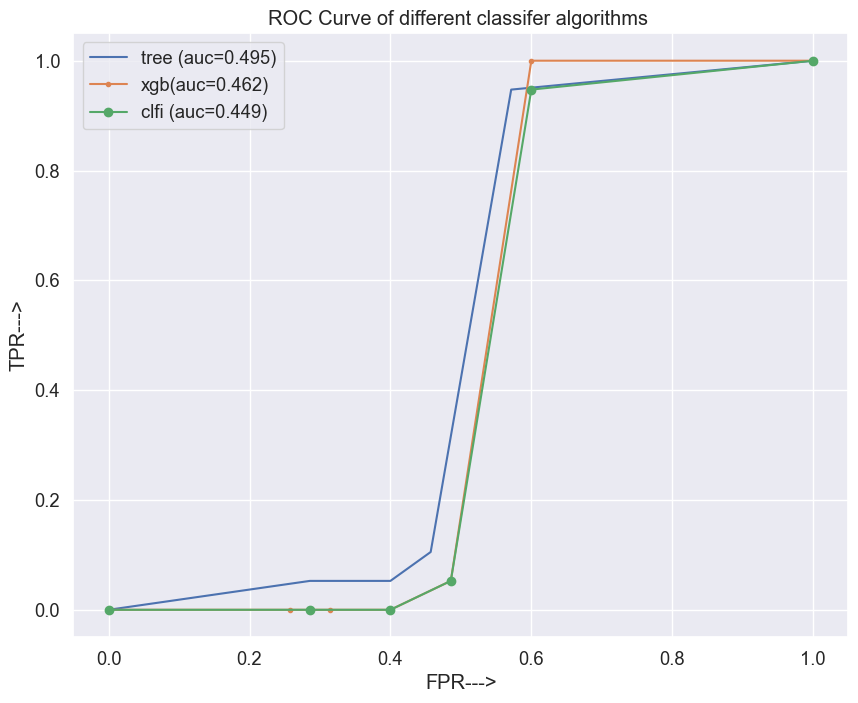

<Figure size 432x288 with 0 Axes>

In [62]:
# ROC-AUC Curve of all models.
plt.figure(figsize=(10,8),dpi=100)
plt.plot(rf_fpr,rf_tpr,linestyle="-",label='tree (auc=%0.3f)' %auc_rfc)
plt.plot(xgb_fpr,xgb_tpr,marker='.',label='xgb(auc=%0.3f)' %auc_xgb)
plt.plot(lgb_fpr,lgb_tpr,marker='o',label='clfi (auc=%0.3f)' %auc_lgb)
plt.xlabel('FPR--->')
plt.ylabel('TPR--->')
plt.title("ROC Curve of different classifer algorithms ")
plt.legend()
plt.show()
plt.savefig('ROC Curve(different algorithms).png')

- AUC for glass type 1 that is usually used for household is very low!! we can conclude that ther glass type 1 is not preferable for household purpose.
- AUC for glass type 2 is far better than glass type-1 but still AUC is low!! we can use type-2 glass for household, but in that case quality of glass might be low.
- best prediction model is xgb as accuracy on test data was high for this model, it was 85%.